In [8]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np  

In [9]:
url = 'ml_python_labexam_2023_02_03.csv'
X = pd.read_csv(url)
X

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948
...,...,...,...,...,...,...,...,...,...,...,...
995,0.002408,0.014426,0.000431,0.602524,0.000004,0.009581,-0.023913,-0.001353,-0.018564,0.000913,-0.448586
996,0.020778,-0.006045,0.009457,0.458784,0.973221,-0.001016,-0.017422,0.028203,-0.028976,0.026134,1.310119
997,0.043912,0.002790,-0.013574,0.708325,0.138217,-0.010312,-0.000105,-0.007212,0.026115,-0.033076,1.080259
998,0.023909,0.001852,-0.003766,0.355062,0.948760,-0.002189,0.006000,0.012622,0.025405,-0.019235,3.540203


In [10]:
X.shape

(1000, 11)

In [11]:
X.dropna(axis = 0, inplace = True)
X.shape

(1000, 11)

there are no useless rows 

In [12]:
X.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


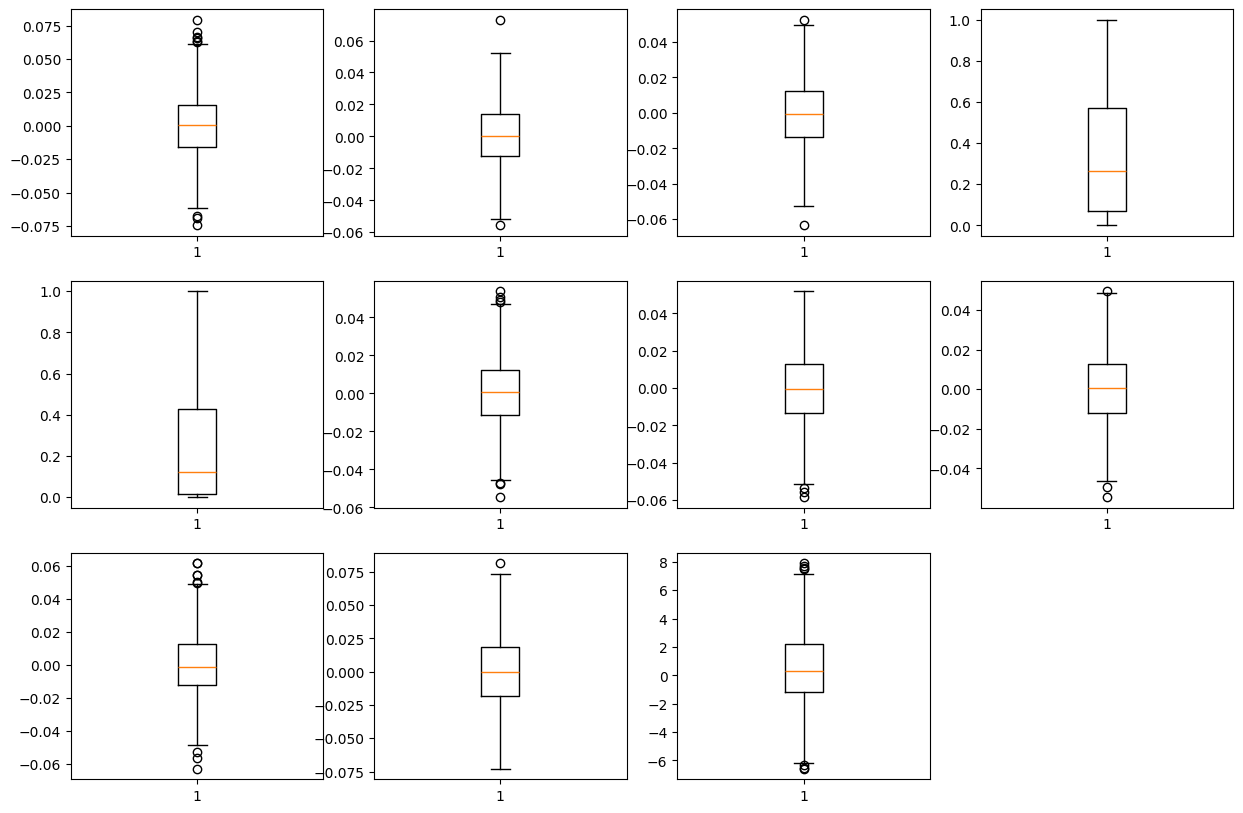

In [16]:
plt.figure(figsize = (15, 10))
pos = 1
for col in X.columns:
    plt.subplot(3, 4, pos)
    plt.boxplot(X[col])
    pos+=1
plt.show()

<Axes: >

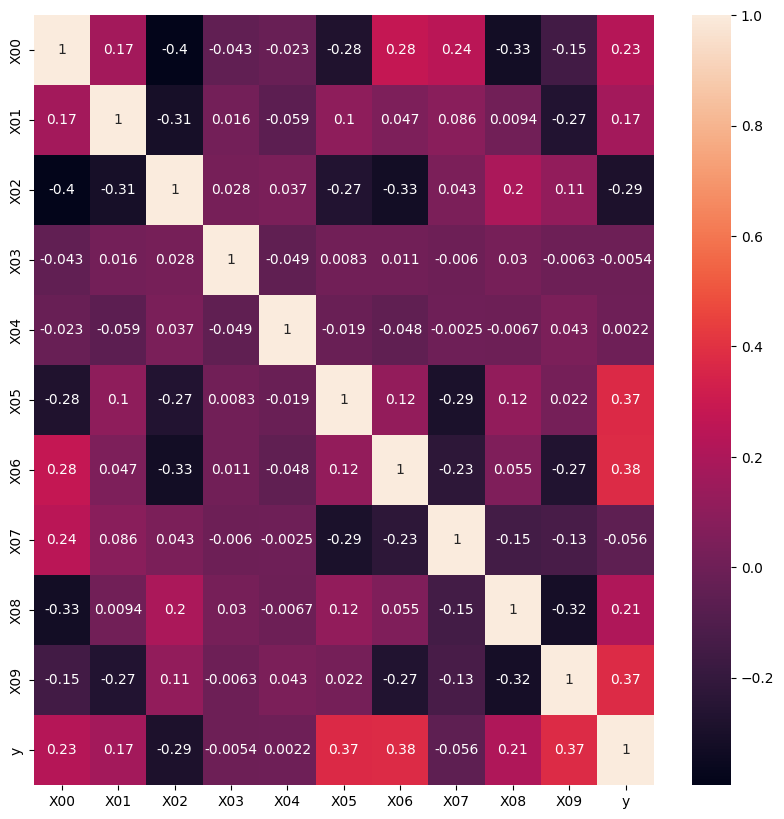

In [18]:
corr = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True)

look at the last row for linear correlation between features and target.
X3, X4, X7 correlates with teh atrget less that .15, then we can exclude them.
outliers are present in most of the columns.

In [21]:
target_col = ['X03', 'X04', 'X07']
Xdrop = X.drop(columns = target_col)
Xdrop

,X00,X01,X02,X05,X06,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.023372,0.003706,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,-0.012447,0.029382,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,-0.004157,0.008240,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.027526,0.012792,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.018246,-0.000294,0.004178,0.014846,1.623948
...,...,...,...,...,...,...,...,...
995,0.002408,0.014426,0.000431,0.009581,-0.023913,-0.018564,0.000913,-0.448586
996,0.020778,-0.006045,0.009457,-0.001016,-0.017422,-0.028976,0.026134,1.310119
997,0.043912,0.002790,-0.013574,-0.010312,-0.000105,0.026115,-0.033076,1.080259
998,0.023909,0.001852,-0.003766,-0.002189,0.006000,0.025405,-0.019235,3.540203


perform a multivariate òinear regression on all teh dataset.


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X, y = X.drop(columns='y'), X['y']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = .7, random_state = 42)
lr_multi = LinearRegression()
lr_multi.fit(Xtrain, ytrain)
ypred_multi = lr_multi.predict(Xtest)
mse = mean_squared_error(ytest, ypred_multi, squared = False)
print(mse)

0.8761183563343509


perform a multivariate linear regression on the selected dataset

In [23]:
Xdrop, ydrop = Xdrop.drop(columns='y'), Xdrop['y']
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdrop, ydrop, train_size = .7, random_state = 42)
lr_multi = LinearRegression()
lr_multi.fit(Xtrain, ytrain)
ypred_multi_drop = lr_multi.predict(Xtest)
mse = mean_squared_error(ytest, ypred_multi_drop, squared = False)
print(mse)

0.9838044848019132


now perform a decision tree regressor on the reduced dataset and teh optimize the parameters with gridsearchcv

In [26]:
from sklearn.tree import DecisionTreeRegressor
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdrop, ydrop, train_size = .7, random_state = 42)
lr_multi = DecisionTreeRegressor()
lr_multi.fit(Xtrain, ytrain)
ypred_multi_drop = lr_multi.predict(Xtest)
mse = mean_squared_error(ytest, ypred_multi_drop, squared = False)
print(mse)
max_max_depth = lr_multi.tree_.max_depth
print(max_max_depth)

2.110195093714381
20


In [33]:
from sklearn.model_selection import GridSearchCV
depth = [*range(1, max_max_depth + 1)]
params = [{'max_depth':depth}]
gs = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = params, scoring = 'neg_mean_squared_error')
gs.fit(Xtrain, ytrain)
best_params = gs.best_params_
print(best_params)

{'max_depth': 7}
